# **Ibrahim Abid**
# **i21-0298**
# **AI-J**


Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [7]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [8]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


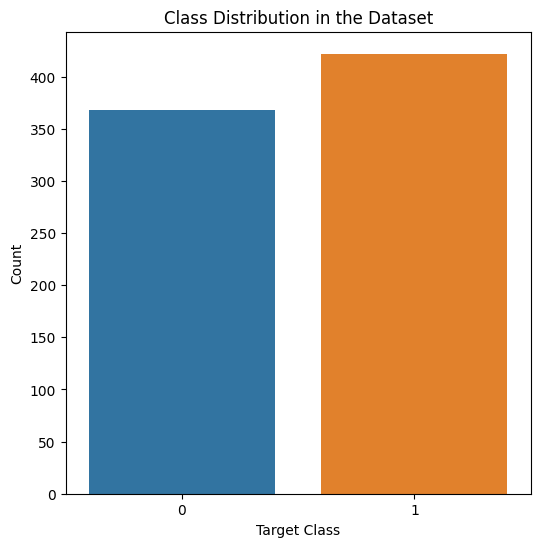

In [32]:
# My Contribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.countplot(x='target', data=heart_data)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

**Data set is imbalanced**

In [10]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# My Contribution
from imblearn.over_sampling import RandomOverSampler

X = heart_data.drop(columns=['target'])  # Features
y = heart_data['target']  # Target variable

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

heart_data = pd.DataFrame(data=X_resampled, columns=X.columns)
heart_data['target'] = y_resampled

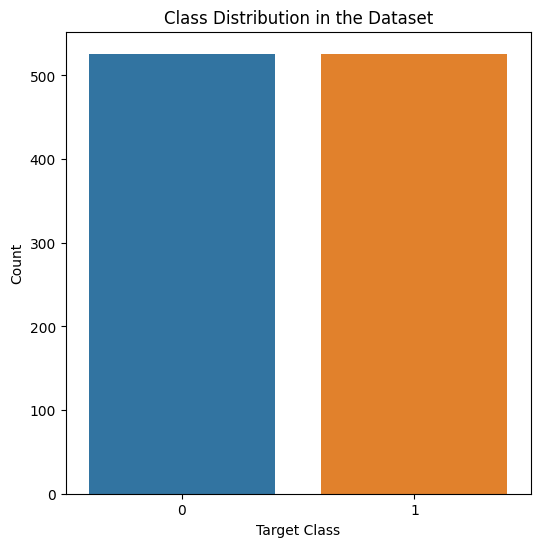

In [12]:
# My Contribution
plt.figure(figsize=(6, 6))
sns.countplot(x='target', data=heart_data)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [13]:
# Checking for Nan values in the  DataFrame

nan_count = heart_data.isna().sum()
print("Number of NaN values in the entire dataset:")
print(nan_count)

Number of NaN values in the entire dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [14]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1047,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
1048,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
1049,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1050,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1051,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


In [15]:
# number of rows and columns in the dataset
heart_data.shape

(1052, 14)

In [16]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1052 non-null   int64  
 1   sex       1052 non-null   int64  
 2   cp        1052 non-null   int64  
 3   trestbps  1052 non-null   int64  
 4   chol      1052 non-null   int64  
 5   fbs       1052 non-null   int64  
 6   restecg   1052 non-null   int64  
 7   thalach   1052 non-null   int64  
 8   exang     1052 non-null   int64  
 9   oldpeak   1052 non-null   float64
 10  slope     1052 non-null   int64  
 11  ca        1052 non-null   int64  
 12  thal      1052 non-null   int64  
 13  target    1052 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 115.2 KB


In [17]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,54.449620,0.701521,0.933460,131.629278,246.143536,0.147338,0.531369,148.660646,0.339354,1.086217,1.377376,0.766160,2.327947,0.500000
std,9.058134,0.457808,1.028306,17.462463,51.290792,0.354612,0.528867,23.245471,0.473715,1.175888,0.617830,1.033444,0.629030,0.500238
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.500000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,165.250000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='sex', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='cp', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='trestbps', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [19]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

0    526
1    526
Name: target, dtype: int64

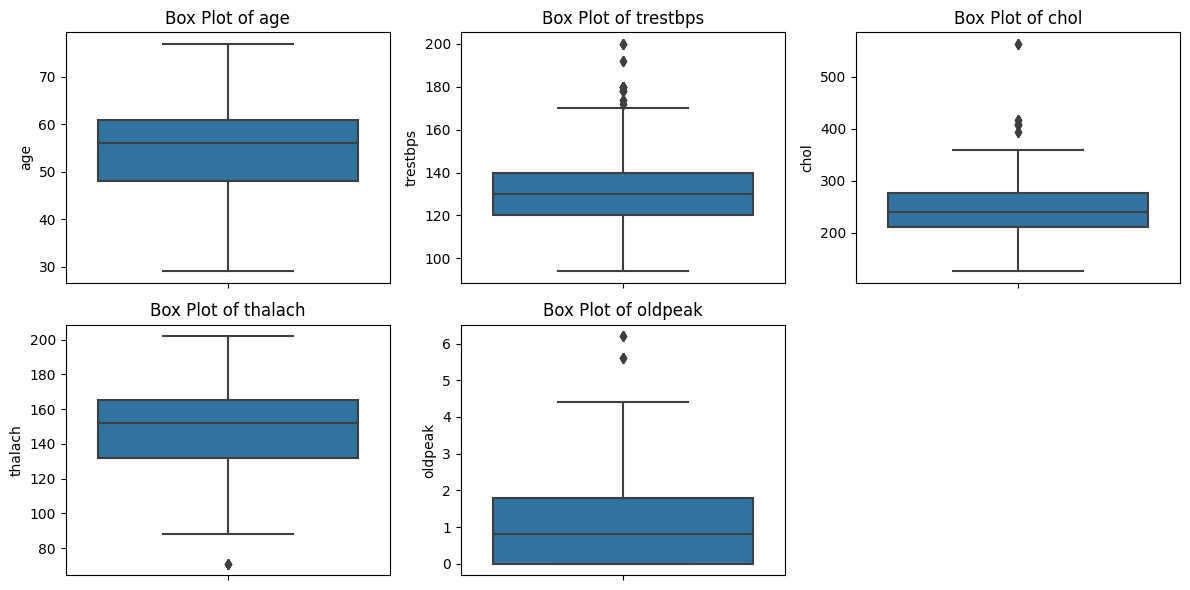

In [20]:
# My Contribution
import matplotlib.pyplot as plt

numerical_attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(12, 6))
for i, attribute in enumerate(numerical_attributes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_data, y=attribute)
    plt.title(f'Box Plot of {attribute}')

plt.tight_layout()
plt.show()

In [21]:
# My Contribution
numerical_columns = heart_data.select_dtypes(include='number')

# Calculate Q1 and Q3 for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outlier_mask = ((numerical_columns < (Q1 - threshold * IQR)) |(numerical_columns > (Q3 + threshold * IQR)))

heart_data = heart_data[~outlier_mask.any(axis=1)]

heart_data.reset_index(drop=True, inplace=True)

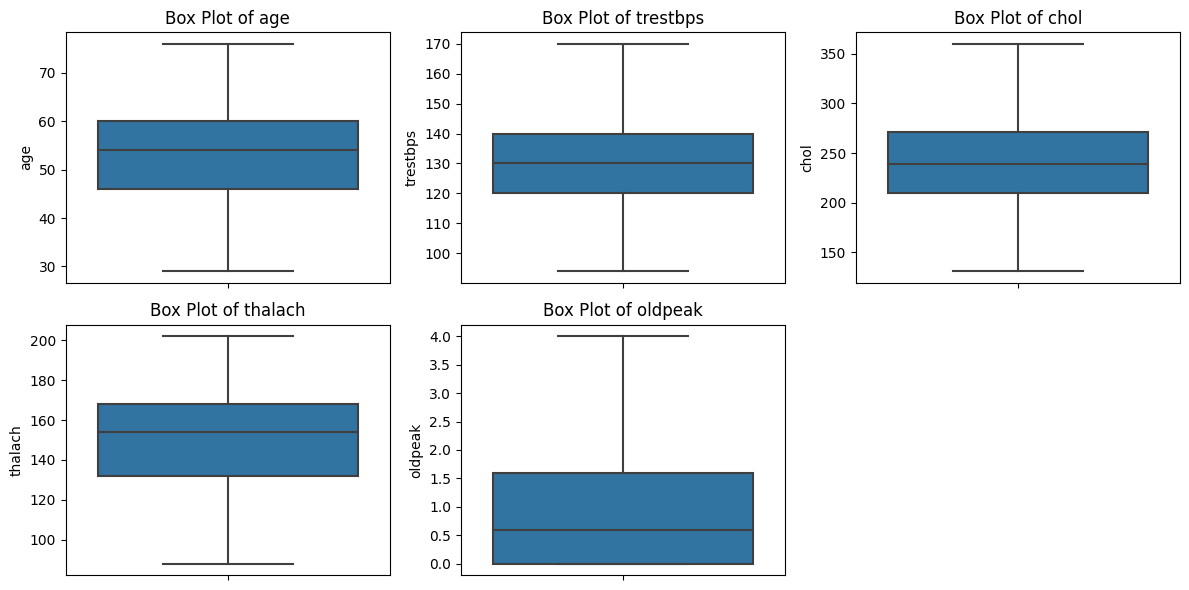

In [22]:
# My Contribution
import matplotlib.pyplot as plt
numerical_attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 6))
for i, attribute in enumerate(numerical_attributes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_data, y=attribute)
    plt.title(f'Box Plot of {attribute}')

plt.tight_layout()
plt.show()

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [23]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [25]:
# My Contribution
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
785    0
786    0
787    0
788    0
789    0
Name: target, Length: 790, dtype: int64


Splitting the Data into Training data & Test Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(790, 13) (632, 13) (158, 13)


Model Training

Logistic Regression

In [29]:
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
# My Contribution
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=60, batch_size=50, validation_split=0.2)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Epoch 1/60
11/11 [==============================] - 1s 28ms/step - loss: 0.6507 - accuracy: 0.6238 - val_loss: 0.5832 - val_accuracy: 0.7323
Epoch 2/60
11/11 [==============================] - 0s 7ms/step - loss: 0.5575 - accuracy: 0.7782 - val_loss: 0.5131 - val_accuracy: 0.8031
Epoch 3/60
11/11 [==============================] - 0s 6ms/step - loss: 0.4869 - accuracy: 0.8416 - val_loss: 0.4541 - val_accuracy: 0.8268
Epoch 4/60
11/11 [==============================] - 0s 6ms/step - loss: 0.4285 - accuracy: 0.8634 - val_loss: 0.4091 - val_accuracy: 0.8583
Epoch 5/60
11/11 [==============================] - 0s 6ms/step - loss: 0.3808 - accuracy: 0.8733 - val_loss: 0.3727 - val_accuracy: 0.8583
Epoch 6/60
11/11 [==============================] - 0s 7ms/step - loss: 0.3430 - accuracy: 0.8752 - val_loss: 0.3477 - val_accuracy: 0.8583
Epoch 7/60
11/11 [==============================] - 0s 6ms/step - loss: 0.3147 - accuracy: 0.8871 - val_loss: 0.3295 - val_accuracy: 0.8583
Epoch 8/60
11/11 [=

In [31]:
# My Contribution
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data = (54,1,0,122,286,0,0,116,1,3.2,1,2,2)
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)  # =1
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)  # =1
input_data = (45,0,1,130,234,0,0,175,0,0.6,1,0,2)  # =1

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

1/1 [==============================] - 0s 27ms/step
[[0.]]
The Person does not have a Heart Disease
